# The Functional API

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [2]:
# Train MNIST with functional API
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Preprocessing data
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
inputs = keras.Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Dropout(0.5)(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2023-10-04 13:59:46.257987: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-04 13:59:46.258025: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-04 13:59:46.258035: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-04 13:59:46.258111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-04 13:59:46.258152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                        

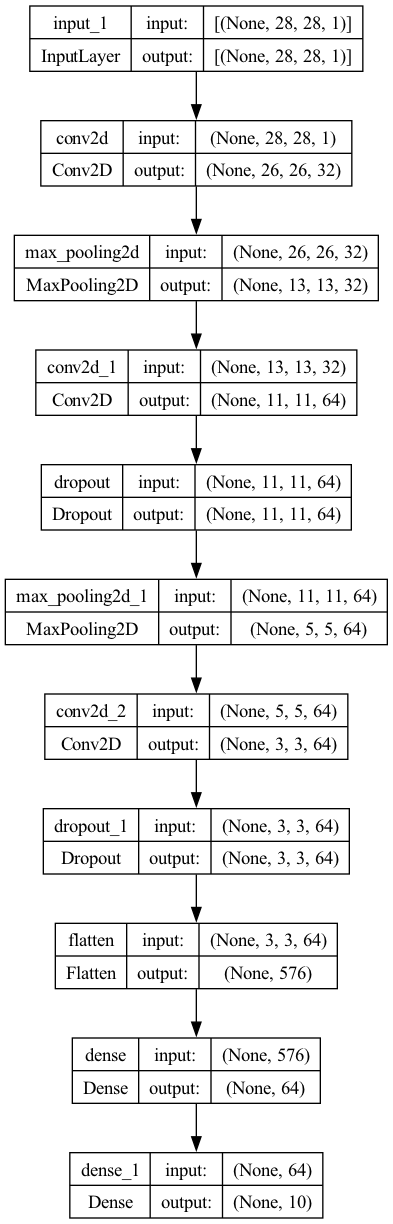

In [7]:
plot_model(model, show_shapes=True)

In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10


2023-10-04 14:00:31.448603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 70s 63ms/step - loss: 0.2383 - accuracy: 0.9254
Epoch 2/10
938/938 [==============================] - 57s 60ms/step - loss: 0.0867 - accuracy: 0.9733
Epoch 3/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 4/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0619 - accuracy: 0.9816
Epoch 5/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0590 - accuracy: 0.9836
Epoch 6/10
938/938 [==============================] - 57s 60ms/step - loss: 0.0578 - accuracy: 0.9848
Epoch 7/10
938/938 [==============================] - 57s 60ms/step - loss: 0.0576 - accuracy: 0.9853
Epoch 8/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0579 - accuracy: 0.9861
Epoch 9/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0594 - accuracy: 0.9858
Epoch 10/10
938/938 [==============================] - 58s 61ms/step - loss: 0.0679 - accurac

2023-10-04 14:10:13.152932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step


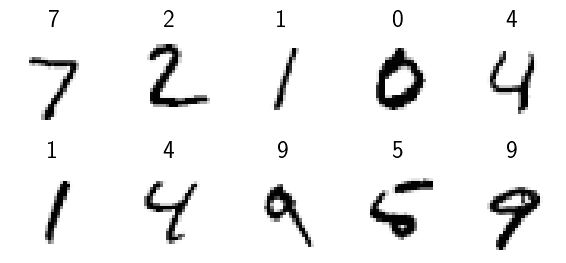

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten()
for img, ax in zip(X_test[:10], axes):
    ax.imshow(img.reshape(28, 28), cmap='Greys')
    pred = np.argmax(model.predict(img.reshape(-1, 28, 28, 1)))
    ax.set_title(pred)
    ax.axis('off')
plt.tight_layout()
plt.show()

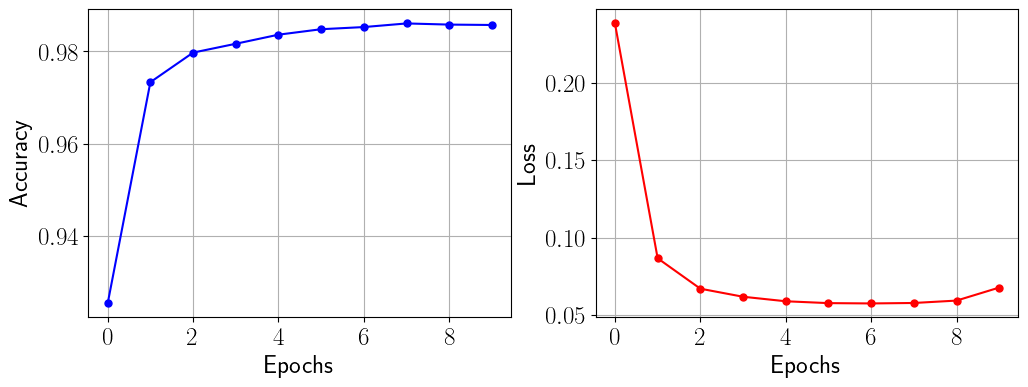

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history.history['accuracy'], color='b', marker='o', markersize=5)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].grid(True)
axes[1].plot(history.history['loss'], color='r', marker='o', markersize=5)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].grid(True)
plt.show()

# Train an autoencoder Fashion MNIST with functional API

In [21]:
from tensorflow.keras.datasets import fashion_mnist

In [22]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [23]:
# Preprocessing data
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [46]:
from keras.src.layers import UpSampling2D, Conv2DTranspose, GlobalMaxPooling2D, Reshape

# Build the model using GlobalMaxPooling2D and Conv2DTranspose
inputs = keras.Input(shape=(28, 28, 1))
x = Conv2D(16, 3, activation='relu')(inputs)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D(3)(x)
x = Conv2D(32, 3, activation='relu')(x)
x = Conv2D(16, 3, activation='relu')(x)
encoded = GlobalMaxPooling2D()(x)
encode = keras.Model(inputs=inputs, outputs=encoded)
x = Reshape((4, 4, 1))(encoded)
x = Conv2DTranspose(16, 3, activation='relu')(x)
x = Conv2DTranspose(32, 3, activation='relu')(x)
x = UpSampling2D(3)(x)
x = Conv2DTranspose(16, 3, activation='relu')(x)
decoded = Conv2DTranspose(1, 3, activation='sigmoid')(x)
decode = keras.Model(inputs=inputs, outputs=decoded)
autoencoder = keras.Model(inputs=inputs, outputs=decoded)
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 6, 6, 32)          9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 16)          4624      
                                                           

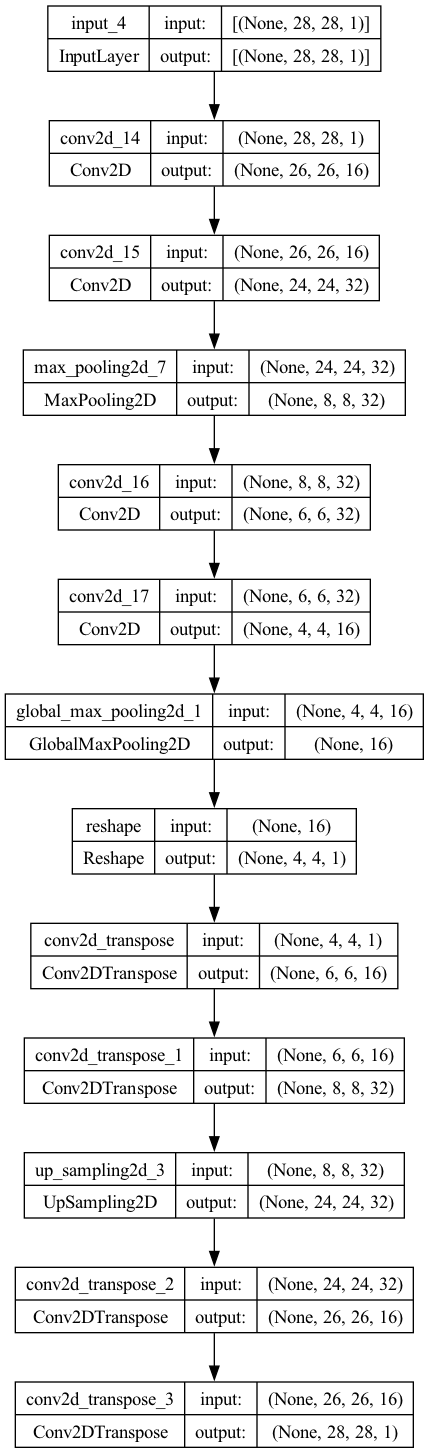

In [47]:
plot_model(autoencoder, show_shapes=True)

In [48]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [49]:
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=128)

Epoch 1/10


2023-10-04 14:42:24.138666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 23s 34ms/step - loss: 0.4208
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3521
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3409
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3354
Epoch 5/10
469/469 [==============================] - 12s 27ms/step - loss: 0.3319
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3298
Epoch 7/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3279
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3264
Epoch 9/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3253
Epoch 10/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3243


2023-10-04 14:44:40.610276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step


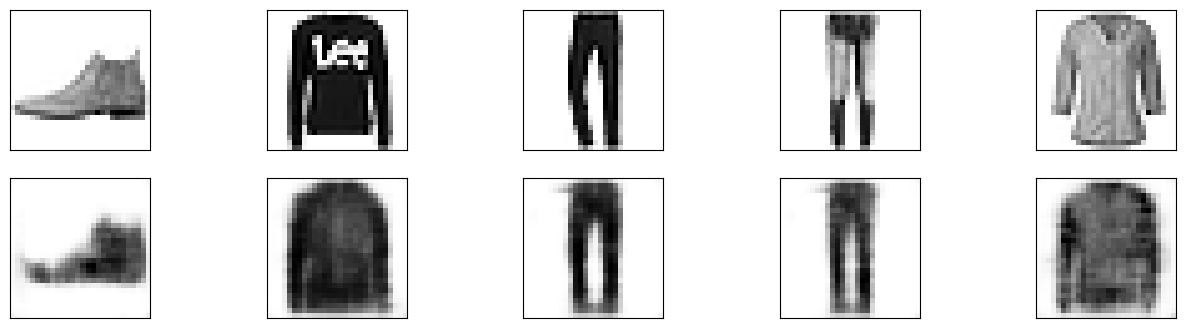

In [50]:
decoded_imgs = autoencoder.predict(X_test)
n = 5
plt.figure(figsize=(16, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [51]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [52]:
model = keras.Model(inputs=inputs, outputs=decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [53]:
history = model.fit(X_train_noisy, X_train, epochs=10, batch_size=128)

Epoch 1/10


2023-10-04 14:44:46.317633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 21s 34ms/step - loss: 0.3602
Epoch 2/10
469/469 [==============================] - 12s 27ms/step - loss: 0.3477
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3452
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3434
Epoch 5/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3423
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3413
Epoch 7/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3400
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3392
Epoch 9/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3385
Epoch 10/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3380


2023-10-04 14:47:01.396079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step


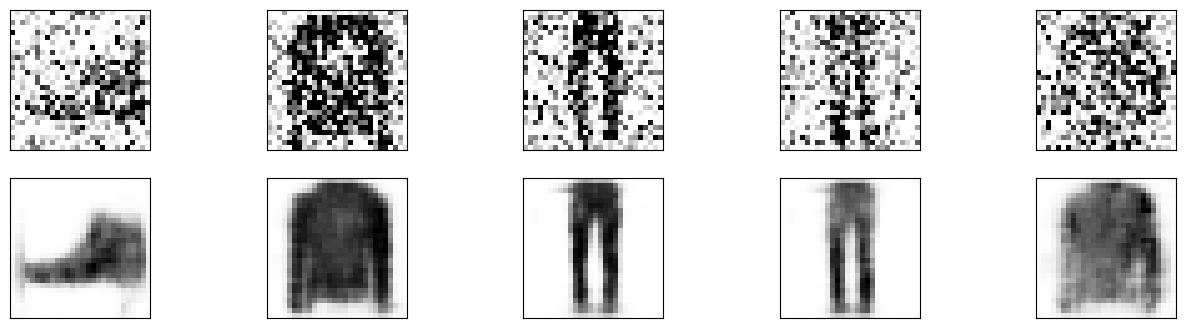

In [54]:
decoded_imgs = model.predict(X_test_noisy)
n = 5
plt.figure(figsize=(16, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()